# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

СТРУКТУРА ПРОЕКТА:
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Заполнение-пропусков." data-toc-modified-id="Заполнение-пропусков.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Заполнение пропусков.</a></span></li><li><span><a href="#Приведение-данных-к-нужным-типам." data-toc-modified-id="Приведение-данных-к-нужным-типам.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Приведение данных к нужным типам.</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-параметров(Площадь,-цена,-число-комнат,-высота-потолков)" data-toc-modified-id="Изучение-параметров(Площадь,-цена,-число-комнат,-высота-потолков)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучение параметров(Площадь, цена, число комнат, высота потолков)</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Время-продажи-квартиры" data-toc-modified-id="Время-продажи-квартиры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Время продажи квартиры</a></span></li><li><span><a href="#Удаление-выбивающихся-значений" data-toc-modified-id="Удаление-выбивающихся-значений-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Удаление выбивающихся значений</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Выявление-факторов,-влияющих-на-стоимость-квартиры." data-toc-modified-id="Выявление-факторов,-влияющих-на-стоимость-квартиры.-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Выявление факторов, влияющих на стоимость квартиры.</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.4.3"><span class="toc-item-num">4.4.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Изучение данных из файла

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_table = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
data_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data_table

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [4]:
data_table.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


### Вывод

Таблица состоит из 23699 строк и 22 столбцов. Неполные данные содержатся в столбцах: ceiling_height (заполнен на 61.2%), floors_total(99.6%), living_area(~92%), is_apartment(11.7%), kitchen_area(90.4%), balcony(51.4%), locality_name(99.8%), airports_nearest(76.6%),  cityCenters_nearest(76.8%), parks_around3000(76.8), parks_nearest(34%), ponds_around3000(76.8), ponds_nearest(38.4%), days_exposition(86.6%).
В таблице присутствуют четыре типа объектов: object, bool, int, float. Тип части данных необходимо преобразовать.
Столбцы, кроме cityCenters_nearest, названы корректно.
Общий объём памяти, занимаемой таблицей, - 3.7 + MB.
Недостающие данные в столбцах floors_total(отсутствует 0.4% данных), locality_name(отсутствует 0.2% данных) слишком малы, чтобы оказать значительное влияние на результат анализа.
Недостающие данные в столбцах living_area(отсутствует ~8% данных),kitchen_area(9.6%) более значительны. Недостающие данные в них будут заменены медианными значениями.

## Предобработка данных

In [5]:
data_table = data_table.rename(columns = {'cityCenters_nearest': 'city_centers_nearest'})#Сохраняю
#название колонки в "змеином" регистре
#data_table.info()
data_table

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Изменил назавние колонки согласно принятому правилу.

### Заполнение пропусков. 

In [6]:
data_table['balcony'] = data_table['balcony'].fillna(0)
#display(data_table['balcony'])


ceiling_height_median = data_table['ceiling_height'].median()

data_table['ceiling_height'].fillna(ceiling_height_median, inplace=True)

living_area_median = data_table['living_area'].median()
kitchen_area_median = data_table['kitchen_area'].median()
display(data_table['living_area'].median())
data_table['living_area'].fillna(living_area_median, inplace=True)
data_table['kitchen_area'].fillna(kitchen_area_median, inplace=True)

data_table['floors_total'].value_counts()

30.0

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
34.0       1
60.0       1
29.0       1
33.0       1
52.0       1
37.0       1
Name: floors_total, dtype: int64

Поменял в столбце balcony значения NaN на ноль. Если в квартире есть балкон, это будет указано в объявлении. Если стоит NaN, значит балкона нет и замена на 0 уместна.
Определяю медиану по высоте потолков для заполнения пустых ячеек. Высота потолков в большинстве квартир не сильно отличается, и медиана может дать общее представление об обычной квартире.
Заполннил пустые ячейки в столбцах living_area и kitchen_area медианными значениями по каждому из них. Поскольку многие дома построенны по типовым проектам, медианное значение в данном случае так же позволит составить общую картину в этом вопросе.

In [7]:
#Заменяю пустые ячейки в столбце is_apartment на значения False.
data_table.loc[data_table['is_apartment'] != True, 'is_apartment'] = False
display(data_table['is_apartment'].value_counts())

False    23649
True        50
Name: is_apartment, dtype: int64

В столбце balcony пропущенные значения заменены на 0, поскольку при наличии балкона об этом всегда пишут.
Для заполнения пустых ячеек в столбцах ceiling_height и days_exposition нашёл медианные значения данных по столбцам для заполнения пустых ячеек.
Заполнил пустые ячейки в столбце ceiling_height медианным значением, поскольку высота потолков в среднем похожа на стандартную.
Заполняю пустые ячейки в столбцах living_area и kitchen_area медианными значениями по каждому из них. Поскольку пустые ячейки в этих столбцах составляют ~8% и 9.6% соответственно, это не приведёт к сколько нибудь значительному искажению картины.
Все значения NaN в столбце is_apartment заменены на False. Поскольку любая жилплощадь, не имеющая пометки "апартаменты", в силу юридических причин может быть отнесена к обычным квартирам.
Значения в столбцах: locality_name, airports_nearest, city_centers_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition оставляем неизменными, поскольку из них либо невозможно вывести среднее или медианное значение (locality_name), либо это не будет иметь практического смысла и может при этом исказить общую картину (airports_nearest, city_centers_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition).

### Приведение данных к нужным типам.

In [8]:
data_table['first_day_exposition'] = pd.to_datetime(data_table['first_day_exposition'],
format = '%Y.%m.%dT%H:%M:%S')

data_table['is_apartment'] = data_table['is_apartment'].astype('bool')
data_table.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

Создал столбец first_day_exposition_date с типом данных datetime.
В столбце is_apartment поменял тип данных с object на bool, поскольку в столбце находятся булевы значения.

## Расчёты и добавление результатов в таблицу

In [9]:
data_table['one_square_meter_price'] = data_table['last_price'] / data_table['total_area']
#Добавил столбец one_square_meter_price с ценой одного квадратного метра в каждой
#квартире.

data_table['year'] = pd.DatetimeIndex(data_table['first_day_exposition']).year#Создал столбец year 
#с годом публикации объявлений.
data_table['month'] = pd.DatetimeIndex(data_table['first_day_exposition']).month#Создал столбец month 
#с месяцем публикации объявлений.
data_table['week_day'] = data_table['first_day_exposition'].dt.weekday#Создал столбец week_day 
#с днями недели публикации объявлений.
display(data_table['month'].head())


0     3
1    12
2     8
3     7
4     6
Name: month, dtype: int64

In [10]:
#Создаю столбец floor_type с типами этажей: 'первый', 'последний', 'другой'.
data_table.loc[data_table['floor'] == 1, 'floor_type'] = 'first_floor'
data_table.loc[data_table['floor'] == data_table['floors_total'], 'floor_type'] = 'last_floor'
data_table['floor_type'] = data_table['floor_type'].fillna('other_floor')
data_table

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_meter_price,year,month,week_day,floor_type
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.370370,2019,3,3,other_floor
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.6,1,False,...,0.0,NaN,0.0,NaN,81.0,82920.792079,2018,12,1,first_floor
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.714286,2015,8,3,other_floor
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,30.0,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.100629,2015,7,4,other_floor
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.000000,2018,6,1,other_floor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,1.0,796.0,3.0,381.0,NaN,72490.845228,2017,3,1,other_floor
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.0,4,False,...,NaN,NaN,NaN,NaN,45.0,52542.372881,2018,1,0,other_floor
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.7,1,False,...,NaN,NaN,NaN,NaN,NaN,44091.710758,2018,2,6,first_floor
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,30.0,12,False,...,2.0,173.0,3.0,196.0,602.0,149511.400651,2017,3,1,other_floor


In [11]:
#Создаю столбец с отношением жилой площади к общей.
data_table['living_space_share'] = data_table['living_area'] / data_table['total_area']

#Создаю столбец с отношением площади кухни к общей площади.
data_table['kitchen_share'] = data_table['kitchen_area'] / data_table['total_area']

#display(data_table['kitchen_to_total_area_ratio'].head(50))

Создал столбцы: one_square_meter_price(содержит цену квадратного метра жилья), week_day(содержит значение дня недели, в который было опубликовано объявление о продаже), floor_type(содержит три типа этажей: первый, последний, другой), living_space_share(содержит значение, отражающее долю жилого помещения в общей площади жилья), kitchen_share(содержит значение, отражающее долю кухни в общей площади жилья).

## Исследовательский анализ данных

### Изучение параметров(Площадь, цена, число комнат, высота потолков)

In [12]:
data_table[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()


,total_area,last_price,rooms,ceiling_height
count,23699.000000,2.369900e+04,23699.000000,23699.000000
mean,60.348651,6.541549e+06,2.070636,2.724358
std,35.654083,1.088701e+07,1.078405,0.988298
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.600000
50%,52.000000,4.650000e+06,2.000000,2.650000
75%,69.900000,6.800000e+06,3.000000,2.700000
max,900.000000,7.630000e+08,19.000000,100.000000


#### Вывод

Разница максимальным значением площади жилья и медианным (и даже средним) значением чрезвычайно велика.
Минимальная и максимальная цены на квартиры неправдободобно отличаются (12190 руб. и 763 млн. рублей). В первом случае, очевидно, можно говорить об ошибке при наборе. Второй может свидетельствовать о продаже "элитного" жилья.
Минимальное значение комнат свидетельствует, вероятно, о наличии в данных информации о студиях. Медианное и среднее значение практически не отличаются, что свидетельствует о небольшом количестве многокомнатных квартир. Их настолько незначительное количество, что на ситуацию принципиально не влияет максимальное значение - 19 комнат.
Минимальное и максимальное значения высоты потолков некорректны.
Необходимо отсечение выброса. Построение диаграмм размаха по данным колонкам даст представление о распренделении значений общей площади жилья, цены, количества комнат и высоты потолков.

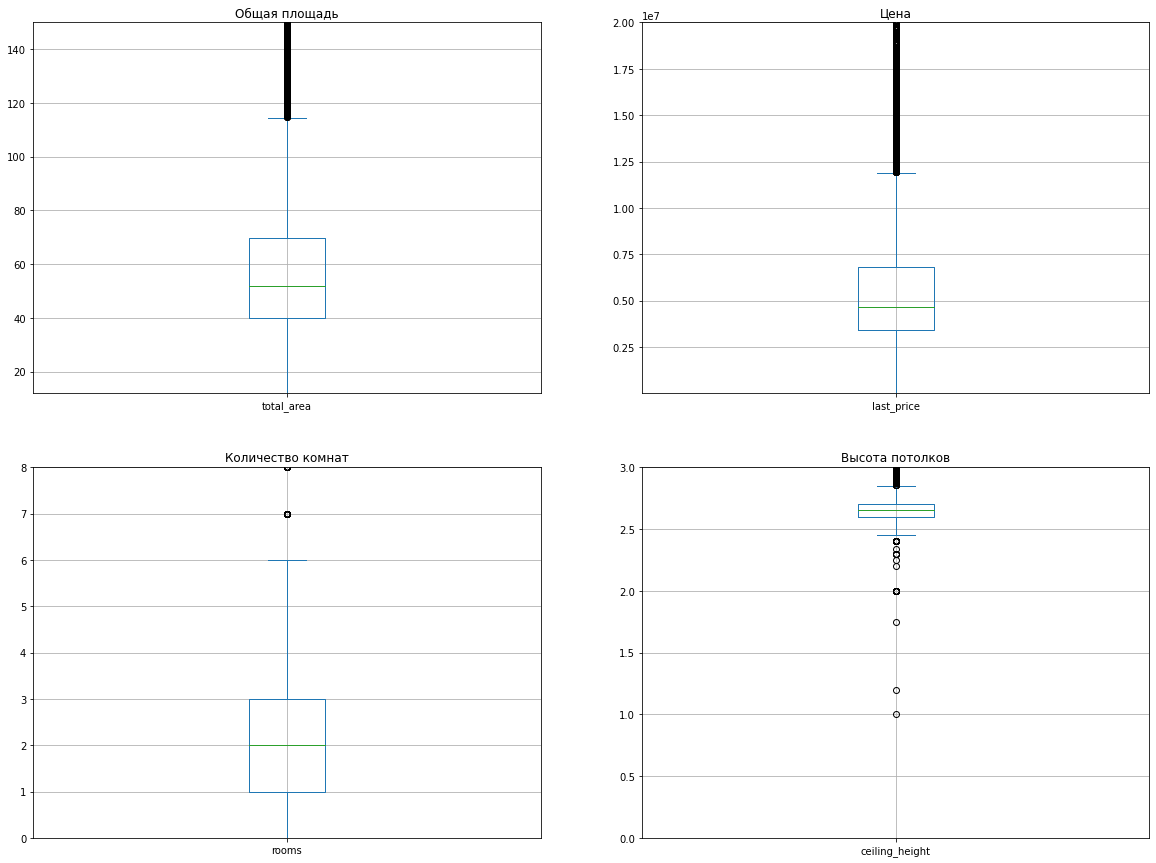

In [13]:
#Определяю выброс по всем четырём категориям.
column_list_box = ['total_area', 'last_price', 'rooms', 'ceiling_height']
title_list_box = ['Общая площадь', 'Цена', 'Количество комнат', 'Высота потолков']
limits_list = [[12, 150], [10000, 20000000], [0, 8], [0, 3]]
ax = data_table[column_list_box].plot(kind='box', subplots=True, layout=(2,2), figsize=(20,15), grid=True)

for i in range(len(column_list_box)):
    ax[column_list_box[i]].set_ylim(limits_list[i])
    ax[column_list_box[i]].title.set_text(title_list_box[i])

#### Вывод

Основная масса квартир имеет площадь от 40 до 70 кв.м. Квартиры площадью более 110 кв.м. составляют выброс.
Основная масса квартир имеет цену от 3.5 миллионов до 12 миллионов рублей. Проблемы с большей или меньшей ценой составляют выброс.
Размах числа комнат - от 0 (гостинки?) до 6. Число комнат больше 6-ти составляет выброс. Основная масса квартир имеет от одной до трёх комнат.
Основная часть квартир имеет потолки высотой от 2.45 м. до 2.85 м. Квартиры с высотой потолков больше 2.85 и меньше 2.45 составляют выброс.

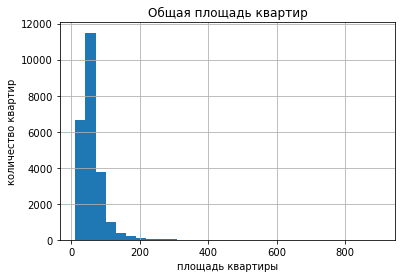

In [14]:
ax = data_table['total_area'].plot(kind='hist', bins=30, grid=True, title='Общая площадь квартир')
ax.set_xlabel('площадь квартиры')
ax.set_ylabel('количество квартир')
plt.show()

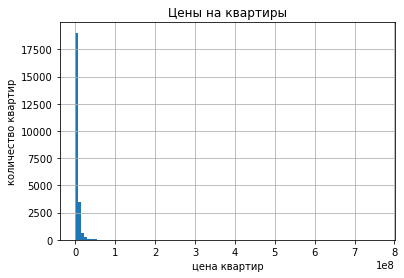

In [15]:
ax = data_table['last_price'].plot(kind='hist', bins=100, grid=True, title='Цены на квартиры')
ax.set_xlabel('цена квартир')
ax.set_ylabel('количество квартир')
plt.show()

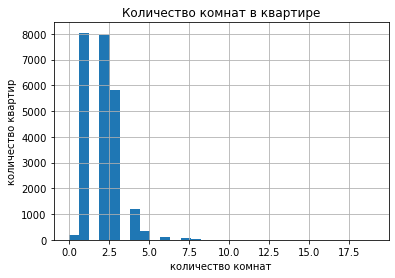

In [16]:
ax = data_table['rooms'].plot(kind='hist', bins=30, grid=True, title='Количество комнат в квартире')
ax.set_xlabel('количество комнат')
ax.set_ylabel('количество квартир')
plt.show()

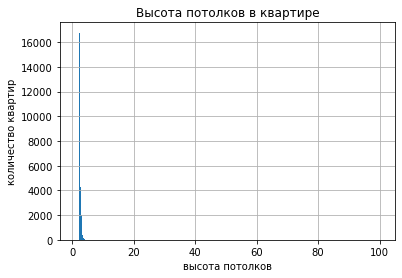

In [17]:
ax = data_table['ceiling_height'].plot(kind='hist', bins=300, grid=True, title='Высота потолков в квартире')
ax.set_xlabel('высота потолков')
ax.set_ylabel('количество квартир')

plt.show()

#### Вывод

Данные гистограмм подтверждают числовые данные. Наибольшее количество квартир имеет площадь от 50 до 100 кв.м.
Цена чаще всего находится в диапазоне от 3 млн. до 5 млн. рублей.
Чаще всего продаются одно- и двухкомнатные квартиры. Несколько меньше - трёхкомнатные. Доли студий и многокомнатных квартир невелики.
Высота потолков в квартирах более чем в половине случаев составляет 2,6-2,7 метров.

### Время продажи квартиры

In [18]:
display(data_table['days_exposition'].describe())
#data_table['days_exposition'].hist(bins = 20)

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

95.0

180.88863436982163

Большой разрыв между минимальным и максимальным значениями времени продажи квартиры. Слишком маленькие значения могут быть ошибкой или продавец быстро передумал продавать. Длительная продажа квартиры может быть вызвана завышенными требованиями продавца, но вероятнее всего является результатом ошибки или не убранного вовремя объявления.
Довольно велика разница между средним и медианным значениями.
Чаще всего продолжительность продажи составляет до 50 дней.

### Удаление выбивающихся значений

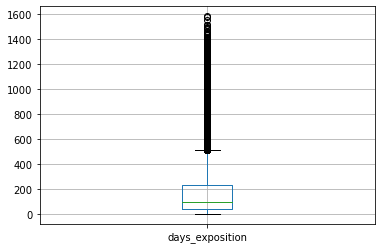

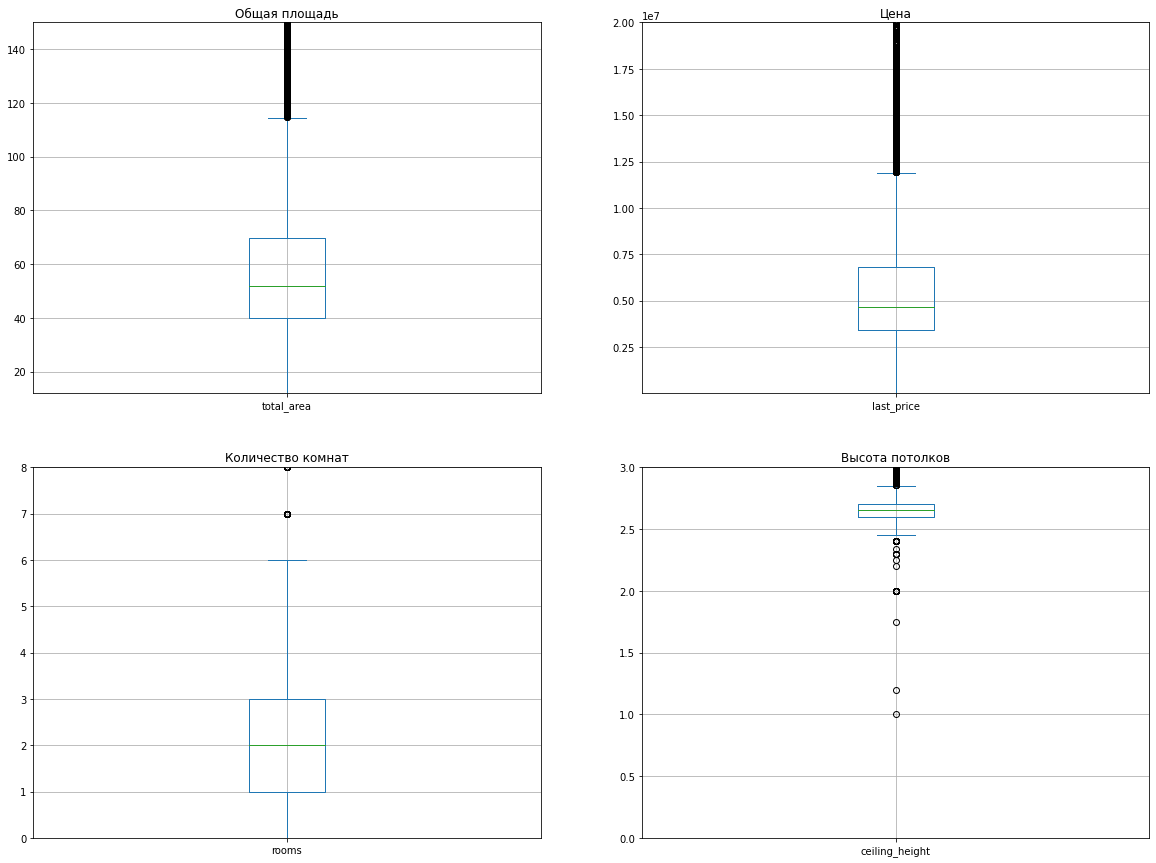

In [19]:
data_table.boxplot(column = 'days_exposition')

title = ['Общая площадь', 'Цена', 'Количество комнат', 'Высота потолков']
limits_list = [[12, 150], [10000, 20000000], [0, 8], [0, 3]]
ax = data_table[column_list_box].plot(kind='box', subplots=True, layout=(2,2), figsize=(20,15), grid=True)

for i in range(len(column_list_box)):
    ax[column_list_box[i]].set_ylim(limits_list[i])
    ax[column_list_box[i]].title.set_text(title_list_box[i])

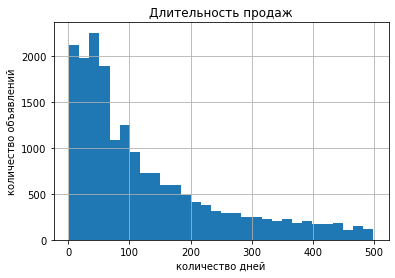

In [20]:
ax = data_table.query('days_exposition < 500')['days_exposition'].plot(kind='hist', bins=30, grid=True, title='Длительность продаж')
ax.set_xlabel('количество дней')
ax.set_ylabel('количество объявлений')
plt.show()

#### Вывод

На гистограмме можно увидеть два странных всплеска сделок. Один до истечения 50-ти дней и один после. Возможно это моменты автоматического закрытия неактуальных или непродлённых анкет на сервисе Яндекс.Недвижимость.
Очень быстрые продажи - продажи совершившиеся в течение первых 45-ти дней. Продажи, длившиеся более 500 дней можно считать очень долгими, так как они составляют выброс.

### Выявление факторов, влияющих на стоимость квартиры.

In [21]:
#Объявляю функцию для выявления факторов, влияющих на стоимость квапртиры.
def data_price_depends(column):
    display(data_table.groupby(column)['last_price'].median().reset_index())
    return

data_price_depends('total_area')


,total_area,last_price
0,12.0,2400000.0
1,13.0,1850000.0
2,13.2,1686000.0
3,14.0,1190000.0
4,15.0,1725000.0
...,...,...
2177,590.0,65000000.0
2178,618.0,300000000.0
2179,631.0,140000000.0
2180,631.2,140000000.0


In [22]:
data_price_depends('rooms')

,rooms,last_price
0,0,2700000.0
1,1,3600000.0
2,2,4770169.0
3,3,6200000.0
4,4,9000000.0
5,5,14000000.0
6,6,19000000.0
7,7,24900000.0
8,8,23095000.0
9,9,23750000.0


In [23]:
data_price_depends('city_centers_nearest')
display(data_table['last_price'].corr(data_table['city_centers_nearest']))

,city_centers_nearest,last_price
0,181.0,31099000.0
1,208.0,5800000.0
2,215.0,10990000.0
3,287.0,9590000.0
4,291.0,11500000.0
...,...,...
7637,64857.0,3650000.0
7638,65105.0,3300000.0
7639,65764.0,4000000.0
7640,65952.0,3600000.0


-0.20674734874298364

In [24]:
data_price_depends('week_day')

,week_day,last_price
0,0,4650000.0
1,1,4730000.0
2,2,4700000.0
3,3,4650000.0
4,4,4585000.0
5,5,4555000.0
6,6,4550000.0


In [25]:
data_price_depends('month')

,month,last_price
0,1,4600000.0
1,2,4650000.0
2,3,4650000.0
3,4,4800000.0
4,5,4515000.0
5,6,4400000.0
6,7,4650000.0
7,8,4570000.0
8,9,4700000.0
9,10,4570000.0


In [26]:
data_price_depends('year')

,year,last_price
0,2014,7700000.0
1,2015,5350000.0
2,2016,4550000.0
3,2017,4500000.0
4,2018,4550000.0
5,2019,5050000.0


Положительная корреляция между площадью жилья и ценой весьма заметна, хотя далеко не абсолютна.
Связь цены и количества комнат достаточно слабая. Этот фактор влияет в два раза меньше, чем площадь жилья.
Удалённость от центра имеет с ценой жилья ещё менее выраженную связь. Однако, что интересно, эта связь - отрицательная. По мере удаления от центра цены на жильё снижаются.
Зависимость цены квартиры от дня недели публикации объявления настолько слабая,что ею можно пренебречь.
То же можно сказать и о зависимости от месяца такой публикации.
Зависимость цены квартиры от   года публикации объявления слабая отрицательная. То есть, с течением лет цены на жильё несколько снижаются. Скорее всего вызвана локальными колебаниями на рынке жилья, когда изменения цены зависят не от года самого по себе, а от не приязанных к календарю обстоятельств, которые следует выявлять отдельно. Возможно, ситуация станет понятнее после построения гистограмм.
Для наглядности проверим при помощи гистограмм влияние на цену квартир всех перечисленных факторов.

In [27]:
# Для определения зависитмости цены на квартиру от удалённости от центра разделяю значения столбца
# city_centers_nearest по категориям.
def city_centers_nearest(value):
    """
    Возвращает степень удалённости от центра, используя правила:
    0-2км от центра (категория 'самый центр');
    2-5км от центра (категория 'центр');
    5-17км от центра (категория 'близко');
    больше 17км от центра (категория 'пригород').
    """
  
    if value < 2500:
        return 'самый центр'
    
    if value < 5000:
        return 'центр'
    
    if value < 17000:
        return 'в пределах города'
    
    if value >= 17000:
        return 'пригород'
    
    return

data_table['city_centers_nearest_group'] = data_table['city_centers_nearest'].apply(city_centers_nearest)

In [28]:
# Для определения зависитмости цены на квартиру от общей площади разделяю значения столбца
# total_area по категориям.
def total_area_categories(value):
    """
    Возвращает диапазон значений площади квартир, используя правила:
    0-29 кв.м. категория 'маленькие квартиры';
    30-40 кв.м. категория 'небольшие квартиры';
    41-57 кв.м. категория 'стандартные квартиры';
    58-70 кв.м. категория 'просторные квартиры'
    больше 70 кв.м. категоррия 'большие квартиры'
    """
    
    if value <= 29:
        return '0-29 кв.м.'
    elif value <= 40:
        return '30-40 кв.м.'
    elif value <= 57:
        return '41-57 кв.м.'
    elif value <= 70:
        return '58-70 кв.м.'
    elif value > 70:
        return 'больше 70 кв.м.'
    
data_table['total_area_group'] = data_table['total_area'].apply(total_area_categories)

In [29]:
#Объявляю функцию для построения серии однотипных гистаграмм.
title_dictionary = {
    'rooms': 'Зависимость цены от количества комнат',
    'floor_type': 'Зависимость цены от этажа',
    'city_centers_nearest_group': 'Зависимость цены от удаленности от центра города',
    'week_day':'Медиана цен по дням недели',
    'month': 'Медиана цен по месяцам',
    'year': 'Медиана цен по годам',
    'total_area_group': 'Зависимость цены от площади квартиры',
    'from_center_km': 'Зависимость цены от удаленности от центра города'

}

def draw_plot(df, column):
    print(df.groupby(column))
    filtered_df = df.groupby(column).median()['last_price'].reset_index().sort_values(by=column)
    plot = filtered_df.plot(
        x=column,
        y='last_price',
        title=title_dictionary[column],
        kind='bar'
    )
    
    return plot

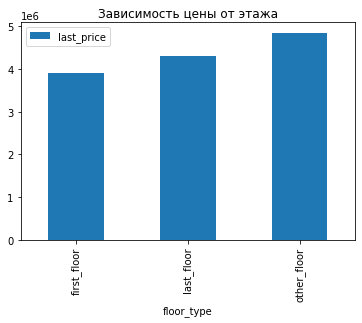

In [30]:
#Вызываю функцию для построения гистаграммы, отражающей зависимость цены квартиры от этажа.
draw_plot(data_table, 'floor_type')
plt.show()

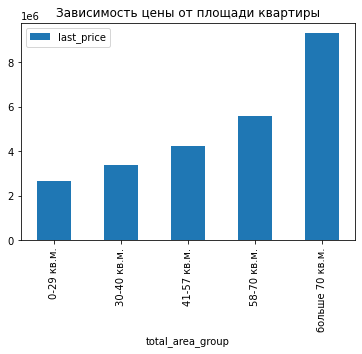

In [31]:
draw_plot(data_table, 'total_area_group')
plt.show()

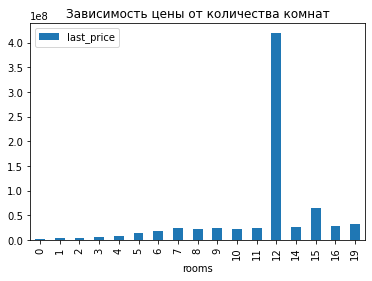

In [32]:
draw_plot(data_table, 'rooms')
plt.show()

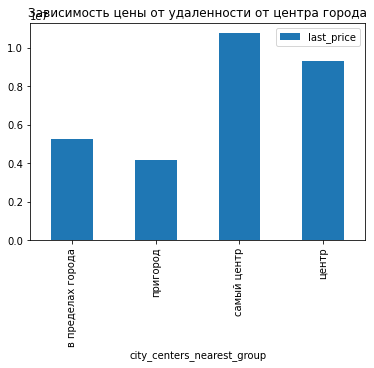

In [33]:
draw_plot(data_table, 'city_centers_nearest_group')
plt.show()

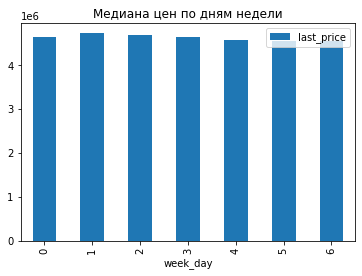

In [34]:
draw_plot(data_table, 'week_day')
plt.show()

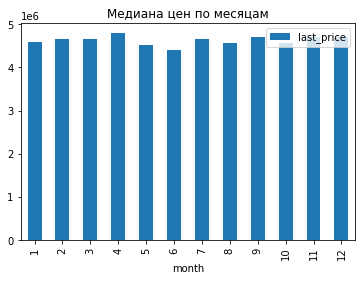

In [35]:
draw_plot(data_table, 'month')
plt.show()

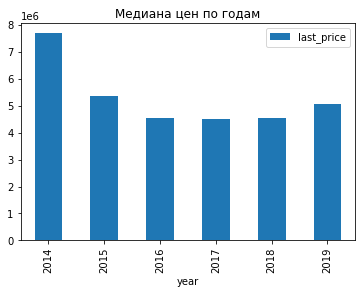

In [36]:
draw_plot(data_table, 'year')
plt.show()

In [37]:
data_table['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

#### Вывод

Прослеживается ожидаемая зависимость цен на квартиры от этажа. Квартиры на первом этаже ожидаемо дешевле, чем на любом другом. Разница медианной цены квартиры на первом и полследнем этажах около полутора раз, что очень много. Выше всего цена на квартиры между первым этажом и этажами, относящимися к категории "другие" (other_floor).
По мере роста площади жилья цены, разумеется растут.
Растут цены и при увеличении количества комнат. Тенденция сохраняется при увеличении их числа до семи. Затем прослеживается своего рода плато - цены на жильё почти не изменяются в диапазоне жилья от 7 до 11 комнат включительно. Можно предположить, что речь идёт о домах/квартирах за пределами Санкт-Петербурга. Резкий скачок  цен на 12-комнатное жильё на графике является аномалией. В данных есть только один дом/квартира с 12 комнатами, и резкий скачок цены объясняется личными ожиданиями продавца. (Риэлторы обычно говорят в этих случаях:"Вы можете выставить любую цену. Вопрос, сможете ли вы продать своё жильё")
По мере удаления от центра по категроиям территорий ("самый центр", "центр", "в пределах города", "пригород") стоимость жилья ожидаемо снижается.
Изменения цен на квартиры по дням недели и месяцам не имеют принципиального значения и вызвано краткосрочными обстоятельствами.
При изучении динамики цен по дням заметно, что относительный рост цен приходится на вторник, субботу и воскресенье. Два последних дня недели - выходные, что позволяет потенциальным покупателям активнее идти на сделки. Соответственно на фоне относительного роста спроса происходит относительный (пусть и небольшой) рост цен.
Некоторое снижение цен по месяцам заметно в летний период. Возможно в это время часть потенциальных покупателей тратит время и деньги на отпуск, и спрос на жильё несколько снижается.
Медиана цен на жильё по годам отражает макроэкономические изменения. Цены в 2015 г. снизились почти в полтора раза в сравнении с 2014 г., и в следующем году продолжили снижаться. Затем два года цены оставались на одном уровне, и только в 2019 г. наметился их рост. Хотя цены так и не достигли даже уровне 2015 г. Такое явление вероятнее всего было вызвано международными санкциями в отношении России, которые повлекли за собой снижение экономической активности и снижение доходов потенциальных покупателей и их возможности приобретать жильё.

In [38]:
sorted_df = data_table.pivot_table(index = 'locality_name', values = 'first_day_exposition', aggfunc = 'count').sort_values(by = 'first_day_exposition', ascending = False)
#display(filtered_df.head(10))
#Создал таблицу с количеством объявлений о продаже. Методом head() вывел 10  населённых пунктов
#с максимальным количеством объявлений.

sorted_df['avg_meter_price'] = data_table.pivot_table(index = 'locality_name', values = 'one_square_meter_price', aggfunc = 'mean')
#display(filtered_df.head(10))
#Дополнил сводную таблицу колонкой со средней ценой за квадратный метр по каждому населённому
#пункту. Методом head() вывел 10  населённых пунктов с максимальным количеством объявлений
#в этой таблице.
sorted_df['avg_price'] = data_table.pivot_table(index = 'locality_name', values = 'last_price', aggfunc = 'mean')
display(sorted_df.head(10))

,first_day_exposition,avg_meter_price,avg_price
locality_name,,,
Санкт-Петербург,15721,114849.008794,8.062507e+06
посёлок Мурино,522,85752.189195,3.672049e+06
посёлок Шушары,440,78677.364217,4.108082e+06
Всеволожск,398,68654.473986,3.789068e+06
Пушкин,369,103125.819291,6.469036e+06
Колпино,338,75424.579098,3.964021e+06
посёлок Парголово,327,90175.913458,4.488075e+06
Гатчина,307,68746.146763,3.488337e+06
деревня Кудрово,299,92473.547576,4.234158e+06


<div class="alert alert-block alert-success">
<b>✔️ Success:</b> отличная работа!

Населённые пункты с наибольшим количеством объявлений найдены. Выявлена средняя цена квадратного метра в них. Самые дорогие квартиры (в том числе - по цене квадратного метра) - Санкт-Петербург и Пушкин. Самая низкая стоимость жилья в Гатчине, Всеволожске и Выборге.

In [39]:
#Создаю таблицу с данными для Санкт-Петербурга.
table_SPB = data_table[data_table['locality_name'] == 'Санкт-Петербург']
#Создаю столбец с расстоянием до центра в километрах: округляю до целых значений.
table_SPB['from_center_km'] = (table_SPB.loc[:, 'city_centers_nearest']/1000).round()
display(table_SPB)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,one_square_meter_price,year,month,week_day,floor_type,living_space_share,kitchen_share,city_centers_nearest_group,total_area_group,from_center_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,120370.370370,2019,3,3,other_floor,0.472222,0.231481,в пределах города,больше 70 кв.м.,16.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.3,4,False,...,92785.714286,2015,8,3,other_floor,0.612500,0.148214,в пределах города,41-57 кв.м.,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,30.0,9,False,...,408176.100629,2015,7,4,other_floor,0.188679,0.057233,в пределах города,больше 70 кв.м.,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,100000.000000,2018,6,1,other_floor,0.320000,0.410000,в пределах города,больше 70 кв.м.,8.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,30.0,22,False,...,110544.692737,2019,4,3,other_floor,0.418994,0.263966,в пределах города,больше 70 кв.м.,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15.0,16.3,4,False,...,100566.572238,2018,2,2,other_floor,0.461756,0.257790,в пределах города,30-40 кв.м.,16.0
23690,3,5500000.0,52.00,2018-07-19,2,2.65,5.0,31.0,2,False,...,105769.230769,2018,7,3,other_floor,0.596154,0.115385,в пределах города,41-57 кв.м.,6.0
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.3,7,False,...,129903.978052,2016,10,3,other_floor,0.552812,0.145405,центр,больше 70 кв.м.,4.0
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,72490.845228,2017,3,1,other_floor,0.547792,0.103356,центр,больше 70 кв.м.,4.0


In [40]:
display(table_SPB['last_price'].corr(table_SPB['from_center_km']))
#Выявляю корреляцию между расстоянием до центра города и ценой на квартиры.

-0.2593987607930819

Снижение цен на жильё по мере удалённости от центра в пределах Санкт-Петербурга ощутимо заметнее, чем по Санкт-Петербургу и Ленинградской области в целом.

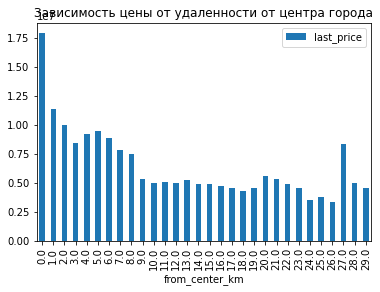

In [41]:
#Считаю среднюю цену для каждого километра.
draw_plot(table_SPB, 'from_center_km')
plt.show()

Цены на жильё резко падают на расстоянии 8-ми км. от центра. Очевидно, что именно на это расстоянии приблизительно находятся границы центральной части города.

In [42]:
#Создаю таблицу для объектов недвижимости, находящихся в центре Санкт-Петербурга.
center_table = table_SPB[table_SPB['from_center_km'] < 8]
display(center_table)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,one_square_meter_price,year,month,week_day,floor_type,living_space_share,kitchen_share,city_centers_nearest_group,total_area_group,from_center_km
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,30.0,9,False,...,408176.100629,2015,7,4,other_floor,0.188679,0.057233,в пределах города,больше 70 кв.м.,7.0
24,8,6500000.0,97.20,2015-10-31,2,2.65,3.0,46.5,1,False,...,66872.427984,2015,10,5,first_floor,0.478395,0.201646,самый центр,больше 70 кв.м.,2.0
35,6,15500000.0,149.00,2017-06-26,5,2.65,5.0,104.0,4,False,...,104026.845638,2017,6,0,other_floor,0.697987,0.114094,центр,больше 70 кв.м.,4.0
51,7,45000000.0,161.00,2017-10-17,3,3.20,8.0,38.0,4,False,...,279503.105590,2017,10,1,other_floor,0.236025,0.310559,в пределах города,больше 70 кв.м.,7.0
52,20,11795000.0,136.00,2017-09-22,6,3.00,2.0,94.0,2,False,...,86727.941176,2017,9,4,last_floor,0.691176,0.080882,в пределах города,больше 70 кв.м.,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23665,11,4250000.0,47.00,2016-05-20,1,2.65,6.0,18.2,1,False,...,90425.531915,2016,5,4,first_floor,0.387234,0.310638,центр,41-57 кв.м.,5.0
23681,13,5250000.0,43.00,2018-05-11,2,2.50,5.0,29.0,2,False,...,122093.023256,2018,5,4,other_floor,0.674419,0.139535,в пределах города,41-57 кв.м.,7.0
23690,3,5500000.0,52.00,2018-07-19,2,2.65,5.0,31.0,2,False,...,105769.230769,2018,7,3,other_floor,0.596154,0.115385,в пределах города,41-57 кв.м.,6.0
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.3,7,False,...,129903.978052,2016,10,3,other_floor,0.552812,0.145405,центр,больше 70 кв.м.,4.0


In [43]:
center_table[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,3525.000000,3.525000e+03,3525.000000,3525.000000
mean,93.168641,1.489553e+07,2.834326,2.953898
std,59.473561,2.432091e+07,1.449808,0.736863
min,12.000000,1.600000e+06,0.000000,2.400000
25%,57.000000,6.690000e+06,2.000000,2.650000
50%,78.700000,9.200000e+06,3.000000,2.800000
75%,110.000000,1.450000e+07,3.000000,3.150000
max,631.200000,7.630000e+08,19.000000,32.000000


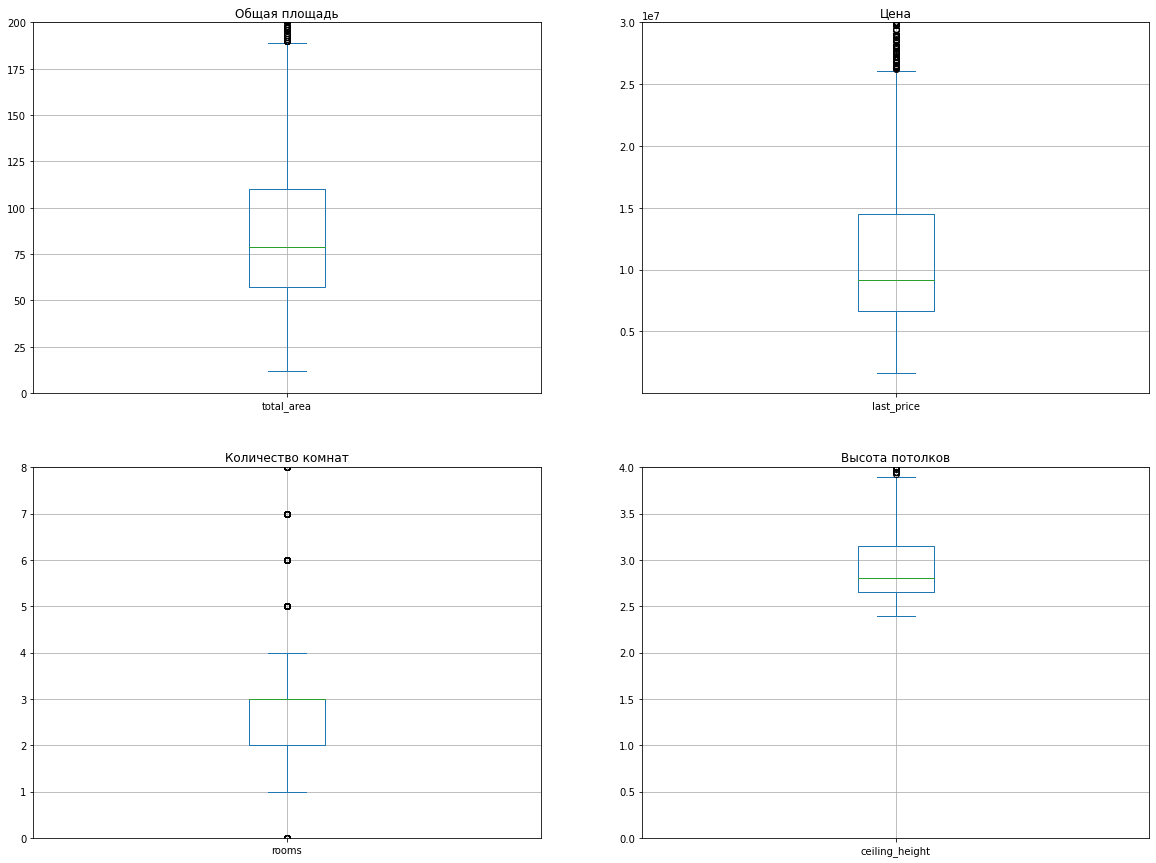

In [44]:
column_list_box = ['total_area', 'last_price', 'rooms', 'ceiling_height']
title_list = ['Общая площадь', 'Цена', 'Количество комнат', 'Высота потолков']
limits_list = [[0, 200], [10000, 30000000], [0, 8], [0, 4]]
ax = center_table[column_list_box].plot(kind='box', subplots=True, layout=(2,2), figsize=(20,15), grid=True)

for i in range(len(column_list_box)):
    ax[column_list_box[i]].set_ylim(limits_list[i])
    ax[column_list_box[i]].title.set_text(title_list[i])
    

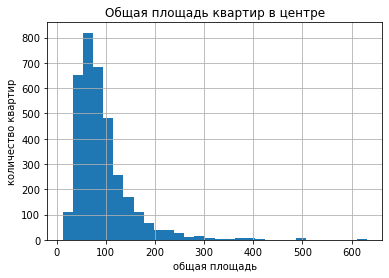

In [45]:
ax = center_table['total_area'].plot(kind='hist', bins=30, grid=True, title='Общая площадь квартир в центре')
ax.set_xlabel('общая площадь')
ax.set_ylabel('количество квартир')

plt.show()

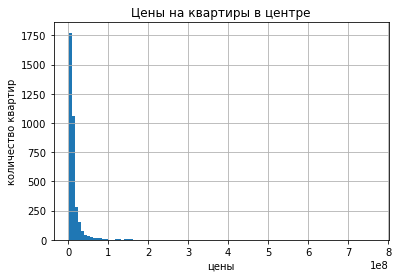

In [46]:
ax = center_table['last_price'].plot(kind='hist', bins=100, grid=True, title='Цены на квартиры в центре')
ax.set_xlabel('цены')
ax.set_ylabel('количество квартир')

plt.show()

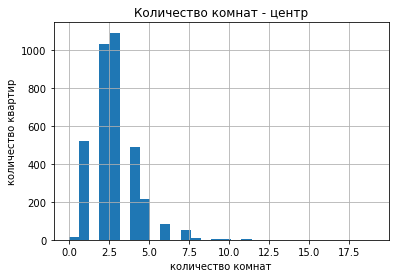

In [47]:
ax = center_table['rooms'].plot(kind='hist', bins=30, grid=True, title='Количество комнат - центр')
ax.set_xlabel('количество комнат')
ax.set_ylabel('количество квартир')

plt.show()

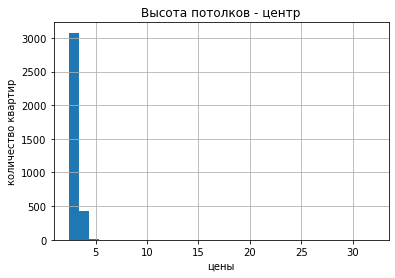

In [48]:
ax = center_table['ceiling_height'].plot(kind='hist', bins=30, grid=True, title= 'Высота потолков - центр')
ax.set_xlabel('цены')
ax.set_ylabel('количество квартир')

plt.show()

#### Вывод

50% жилья в центральной части Санкт-Петербурга имеет площадь от 57 до 110 кв.м. В целом основная масса квартир имеет площадь от 12 до 185 кв.м.
Стоимость 50% жилья в центральной части Санкт-Петербурга составляет от 7 млн. до 14 млн. рублей. Межквартильный размах составляет от 2 млн. до 26 млн. рублей, что, по-видимому, свидетельствует о различном качестве жилья и согласуется с разницей площадей квартир.
Основная масса продаваемых в Центре Санкт-Петербурга квартир имеет от одной до четырёх комнат. Чаще всего продаются двух- и трёхкомнатных квартир.
Высота потолков в квартирах в центре города варьируется преимущественно в пределах от 2.4 м. до 3.9 м. 50% всех квартир имеет высоту потолков в диапазоне от 2.6 до 2.8 м.
Приведённые выводы проиллюстрированы гистограммами, расположенными ниже.

In [49]:
#Объявляю функцию для выявления факторов, влияющих на стоимость квартиры в центре Санкт-Петербурга.
def data_price_depends_center(column):
    display(center_table.groupby(column)['last_price'].median().reset_index())
    return

data_price_depends_center('total_area')



,total_area,last_price
0,12.0,2400000.0
1,13.0,2825000.0
2,13.2,1686000.0
3,15.5,2450000.0
4,16.0,2100000.0
...,...,...
1154,517.0,50000000.0
1155,590.0,65000000.0
1156,618.0,300000000.0
1157,631.0,140000000.0


In [50]:
data_price_depends_center('rooms')

,rooms,last_price
0,0,5050000.0
1,1,6000000.0
2,2,7703451.0
3,3,10000000.0
4,4,12200000.0
5,5,14900000.0
6,6,19500000.0
7,7,24900000.0
8,8,21045000.0
9,9,29000000.0


In [51]:
data_price_depends_center('from_center_km')
display(center_table['last_price'].corr(center_table['from_center_km']))

,from_center_km,last_price
0,0.0,17900000.0
1,1.0,11395000.0
2,2.0,10000000.0
3,3.0,8409000.0
4,4.0,9200000.0
5,5.0,9500000.0
6,6.0,8900000.0
7,7.0,7800000.0


-0.04054892363363874

In [52]:
data_price_depends_center('week_day')

,week_day,last_price
0,0,9393000.0
1,1,9175000.0
2,2,9390000.0
3,3,9300000.0
4,4,9010000.0
5,5,8639000.0
6,6,9450000.0


In [53]:
data_price_depends_center('month')

,month,last_price
0,1,10000000.0
1,2,9500000.0
2,3,9400000.0
3,4,9000000.0
4,5,8900000.0
5,6,8900000.0
6,7,9200000.0
7,8,8978706.5
8,9,9600000.0
9,10,8700000.0


In [54]:
data_price_depends_center('year')

,year,last_price
0,2014,19800000.0
1,2015,10500000.0
2,2016,9495000.0
3,2017,9000000.0
4,2018,8850000.0
5,2019,9488000.0


In [55]:
# Для определения зависитмости цены на квартиру от удалённости от центра разделяю значения столбца
# city_centers_nearest по категориям.
def center_nearest(value):
    """
    Возвращает степень удалённости от центра, используя правила:
    0 км от центра (категория '0');
    1 км от центра (категория '1');
    2 км от центра (категория '2');
    3 км от центра (категория '3');
    4 км от центра (категория '4');
    5 км от центра (категория '5');
    6 км от центра (категория '6');
    7 км от центра (категория '7').
    """
  
    if value < 1:
        return '0'
    elif value == 1:
        return '1'
    elif value == 2:
        return '2'
    elif value == 3:
        return '3'
    elif value == 4:
        return '4'
    elif value == 5:
        return '5'
    elif value == 6:
        return '6'
    else:
        return '7'

center_table['city_centers_nearest_group'] = center_table['from_center_km'].apply(center_nearest)

In [56]:
#Объявляю функцию для построения серии однотипных гистаграмм.
title_dictionary = {
    'rooms': 'Зависимость цены от количества комнат',
    'floor_type': 'Зависимость цены от этажа',
    'city_centers_nearest_group': 'Зависимость цены от удаленности от центра города',
    'week_day':'Медиана цен по дням недели',
    'month': 'Медиана цен по месяцам',
    'year': 'Медиана цен по годам',
    'total_area_group': 'Зависимость цены от площади квартиры',
    'from_center_km': 'Зависимость цены от удаленности от центра города'

}

def draw_plot(df, column):
    filtered_df = df.groupby(column).mean()['last_price'].reset_index().sort_values(by=column)
    plot = filtered_df.plot(
        x=column,
        y='last_price',
        title=title_dictionary[column],
        kind='bar'
    )
    
    return plot

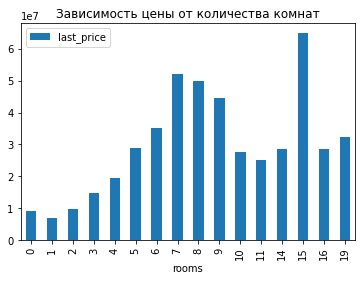

In [57]:
draw_plot(center_table, 'rooms')
plt.show()

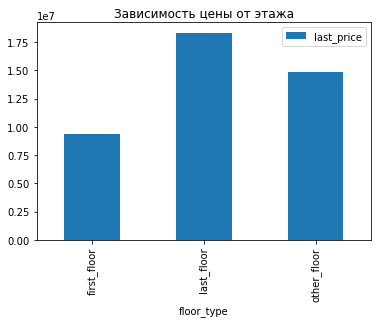

In [58]:
draw_plot(center_table, 'floor_type')
plt.show()

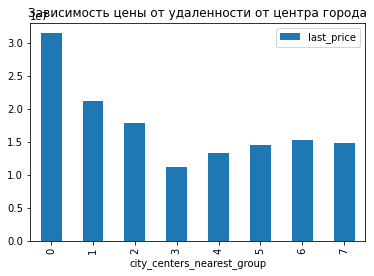

In [59]:
draw_plot(center_table, 'city_centers_nearest_group')
plt.show()

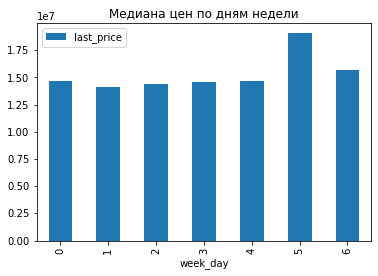

In [60]:
draw_plot(center_table, 'week_day')
plt.show()

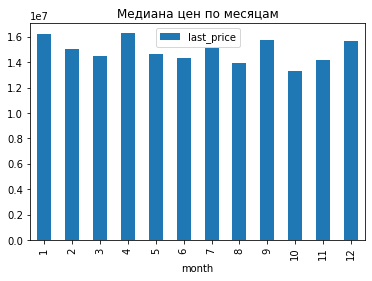

In [61]:
draw_plot(center_table, 'month')
plt.show()

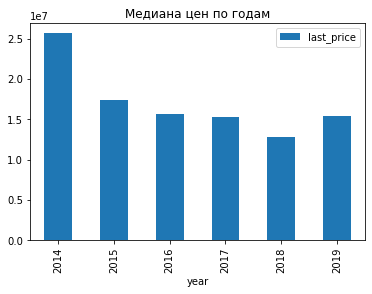

In [62]:
draw_plot(center_table, 'year')
plt.show()

#### Вывод

Корреляция цены с площадью жилья очевидна. Чем квартира больше, тем она дороже. Зависимость эта выражена довольно сильно.
Значительно зависит цена на квартиры от количества комнат. Хотя здесь корреляция выражена в значительно меньшей степени. Вызвано это тем, что нет прямой связя между площадью  и количеством комнат. Двухкомнатная хрущовка может быть по площади меньше новой однокомнеатной квартиры. Именно площадь является основным параметром в ценоообразовании на рынке жилья.
По мере удаления от центральной точки города жильё дешевеет, но незначительно. Восприятие района как центрального не позволяет сильно снижать цены.

Что касается корреляции цен нажильё со временем опубликования объявлений - такая связь ожидаемо незначительна. Колебания вызваны скорее всего неочевидными факторами психологического свойства и т.п.

## Общий вывод

<AxesSubplot:title={'center':'Зависимость цены от количества комнат'}, xlabel='rooms'>

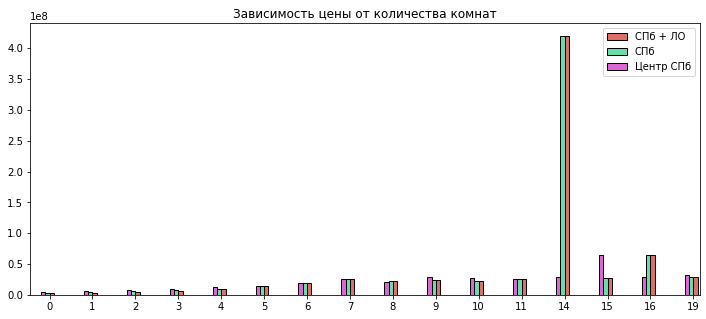

In [63]:
#Сравню ряд изученных параметров по локализации: весь изученный регион, только Санкт_Петербург,
#только центр Санкт_Петербурга.
def depend_price_multiple(list_of_dfs, column):
    dfs_dict = {
        'СПб + ЛО': data_table,
        'СПб': table_SPB,
        'Центр СПб': center_table
    }
    
    title_dict = {
        'rooms': 'Зависимость цены от количества комнат',
        'floor_type': 'Зависимость цены от этажа',
        'week_day':'Медиана цен по дням недели',
        'month': 'Медиана цен по месяцам',
        'year': 'Медиана цен по годам'
    }
    
    list_of_colors = ['#dd6f66', '#66ddaa', '#dd66d5']
    legend_list = []
    
    if column == 'floor_type':
        sort_key = 'last_price'
    else:
        sort_key = column
    
    plt.figure(figsize=(12,5)) 
    ax = plt.gca()
    
    for i in range(len(list_of_dfs)):
        current_df = dfs_dict[list_of_dfs[i]]
        current_df_filtered = current_df.groupby(column).median()['last_price'].reset_index().sort_values(by=sort_key)
        plot = current_df_filtered.plot(
            x=column,
            y="last_price",
            kind='bar',
            ec='black', 
            title=title_dict[column], 
            legend=None,
            color=list_of_colors[i],
            ax=ax, 
            width=0.1, 
            position=i
        )
        legend_list.append(list_of_dfs[i])
        
    x_axis = ax.xaxis
    x_axis.label.set_visible(False)
    ax.legend(legend_list)
    if column not in ['from_center_km', 'day']:
        plt.xticks(rotation=0)
    return plot


depend_price_multiple(['СПб + ЛО', 'СПб', 'Центр СПб'], 'rooms')

<AxesSubplot:title={'center':'Зависимость цены от этажа'}, xlabel='floor_type'>

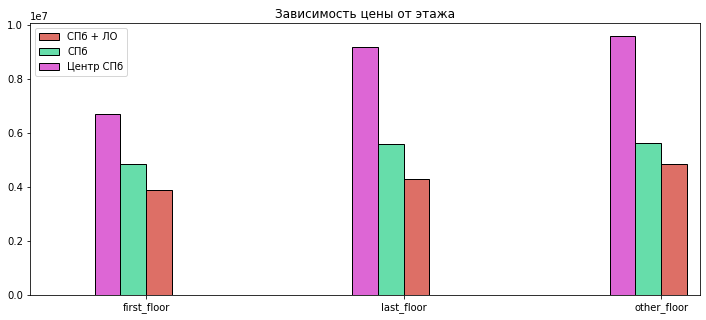

In [64]:
depend_price_multiple(['СПб + ЛО', 'СПб', 'Центр СПб'], 'floor_type')

<AxesSubplot:title={'center':'Медиана цен по дням недели'}, xlabel='week_day'>

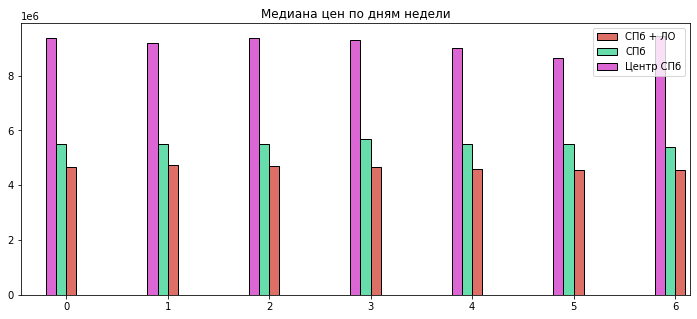

In [65]:
depend_price_multiple(['СПб + ЛО', 'СПб', 'Центр СПб'], 'week_day')

<AxesSubplot:title={'center':'Медиана цен по месяцам'}, xlabel='month'>

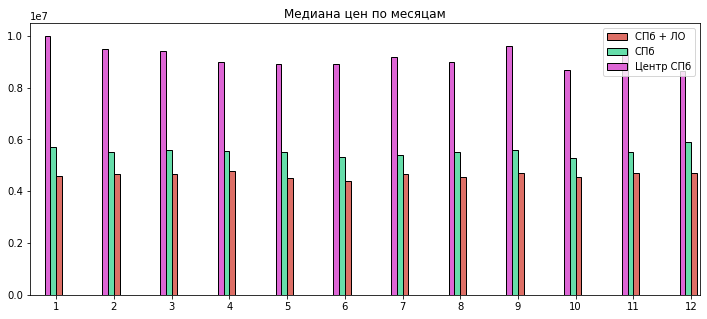

In [66]:
depend_price_multiple(['СПб + ЛО', 'СПб', 'Центр СПб'], 'month')

<AxesSubplot:title={'center':'Медиана цен по годам'}, xlabel='year'>

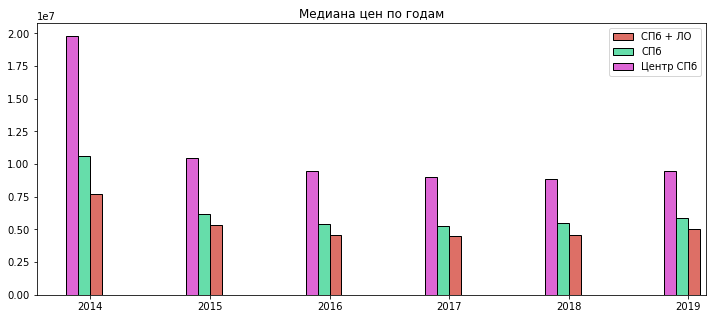

In [67]:
depend_price_multiple(['СПб + ЛО', 'СПб', 'Центр СПб'], 'year')

<AxesSubplot:>

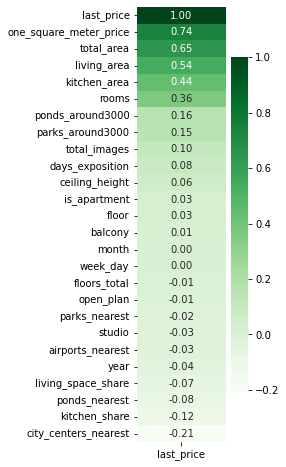

In [68]:
#Выясняю корреляцию цены на квартиру со всеми имеющимися факторами в пределах всего изучаемого региона.
plt.figure(figsize=(2,8))
seaborn.heatmap(data_table.corr()[['last_price']].sort_values(by='last_price', ascending=False), annot=True, cmap="Greens", fmt='.2f')

<AxesSubplot:>

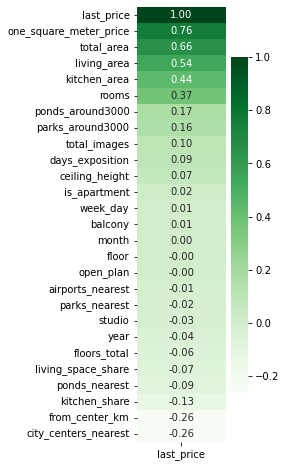

In [69]:
#Выясняю корреляцию цены на квартиру со всеми имеющимися факторами только в пределах Санкт_Петербурга.
plt.figure(figsize=(2,8))
seaborn.heatmap(table_SPB.corr()[['last_price']].sort_values(by='last_price', ascending=False), annot=True, cmap="Greens", fmt='.2f')

<AxesSubplot:>

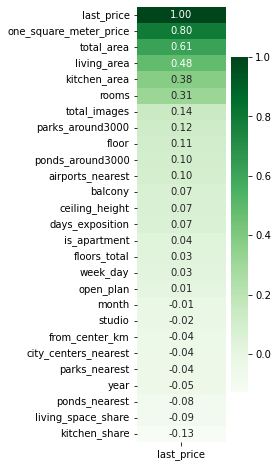

In [70]:
#Выясняю корреляцию цены на квартиру со всеми имеющимися факторами только в центральной части Санкт_Петербурга.
plt.figure(figsize=(2,8))
seaborn.heatmap(center_table.corr()[['last_price']].sort_values(by='last_price', ascending=False), annot=True, cmap="Greens", fmt='.2f')

При изучении данных первоначальной таблицы в сравнении со сводными таблицами по Санкт_Петербургу и центральной его части можно сделать несколько выводов.
1. Основные факторы, определяющие стоимость квартиры это - общая площадь, жилая площадь, в меньшей степени - площадь кухни и, наконец, число комнат. Все остальные факторы не имеют решающего значения. Корреляция между ценой и площадью жилья в центре Санкт-Петербурга несколько ниже, чем по изучаемому региону в целом. Это вызвоно тем, что жильё в центре более предпочтительно. Причиной такого отличия стали, по-видимому, удобство географического расположения жилья и, возможно, бОльшая престижность.
2. Роль остальных факторов в ценообразовании значительно меньше.
3. БОльшая часть квартир продавалась в течение первых 45-50 дней.
4. Стоимость жилья уменьшается по мере удаления от центра с двумя исключениями. Во-первых, в трёх километрах от центра цены ниже, чем в диапазонах до 2- км. и от 4-х до 7-ми км. Во-вторых, на расстоянии 20-23 км. от центра цены на жильё выше, чем на расстоянии 9-20 км. Обе аномалии могут быть объяснены тем, что в городе есть не вполне благополучные районы, где цены могут снижаться. В свою очередь относительно высокие цены на расстоянии 20 км. и больше, можно объяснить тенденцией зажиточных категорий населения к переселению в пригород ради более комфортной среды обитания.
5. Гистограммы, отражающие зависимость цен от этажа показывают, что во всех трёх территориях самыми дешёвыми являются квартиры на первом этаже, а самыми дорогими - квартиры между первым и последним этажами.
6. Совершенно очевидно, что по изучаемым параметрам жильё, продающееся в центре Санкт-Петербурга, в среднем несколько комфортнее, чем в регионе в целом. В частности в 1.35 раза в среднем больше общая площадь квартир, больше количество комнат (двух- и трёхкомнатные квартиры здесь составляют бОльшую долю в продающемся жилье), несколько выше потолки.
7. Сравнение цены квартир по времени публикации объявлений позволяет сделать вывод, что по дню и месяцу нет принципиальных различий ни по центру Санкт-Петербурга, ни по городу в целом, ни по всему изучаемому региону. Колебания цен скорее всего вызваны внешними и во многом субъективными факторами. ЕСли здесь и есть закономерность, она явно не зависит ок календаря.
8. Колебание цен по годам публикации объявлений более значительно и так же как в случае с днём и месяцем публикации объявления, зависит от постороннего фактора. В 2015 г. цены довольно серьёзно упали в сравнении с 2014 г. В следующем году продолжили снижаться. Затем два года оставались на одном уровне. Их рост наметился только в 2019 г. Хотя цены так и не достигли уровне 2015 г. Такое явление вероятнее всего было вызвано международными санкциями в отношении России, которые повлекли за собой снижение экономической активности и снижение доходов потенциальных покупателей и их возможности приобретать жильё.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [x]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [x]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года». 
- [x]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [x]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [x]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод